In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                )
from collections import deque
import random as rng
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
import imutils
from scipy import ndimage
from itertools import combinations
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage.morphology import skeletonize, thin,medial_axis
from skimage import color

rng.seed(12345)

In [ ]:
def plot_comparison(original, filtered, filter1_name, filter2_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(32,16), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray")
    ax1.set_title(filter1_name)
    ax1.axis('off')
    ax2.imshow(filtered, cmap="gray")
    ax2.set_title(filter2_name)
    ax2.axis('off')

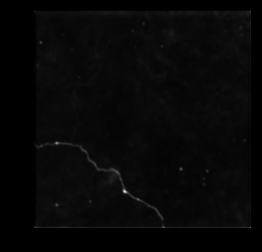

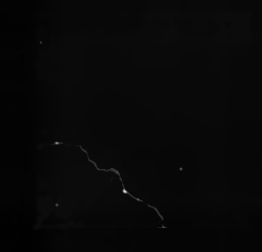

In [ ]:
image = cv2.imread('/content/11.png')
shifted = cv2.pyrMeanShiftFiltering(image, 30, 18)

gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display original image
cv2_imshow(image)
cv2_imshow(gray)



##Performance of model depends on the filtered image and continuous profile of the crack

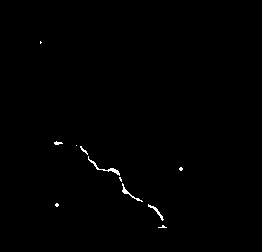

In [ ]:
ret, thresh1 = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh1)


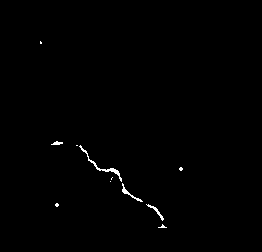

In [ ]:
closed = closing(thresh)
#gr1 = cv2.cvtColor(open, cv2.COLOR_BGR2GRAY)

cv2_imshow(closed)


In [ ]:
z#plot_comparison(closed, opened, 'opened')

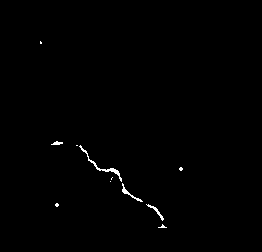

(252, 262)

In [ ]:
# apply binary thresholding
ret, thresh = cv2.threshold(closed, 20, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
thresh.shape

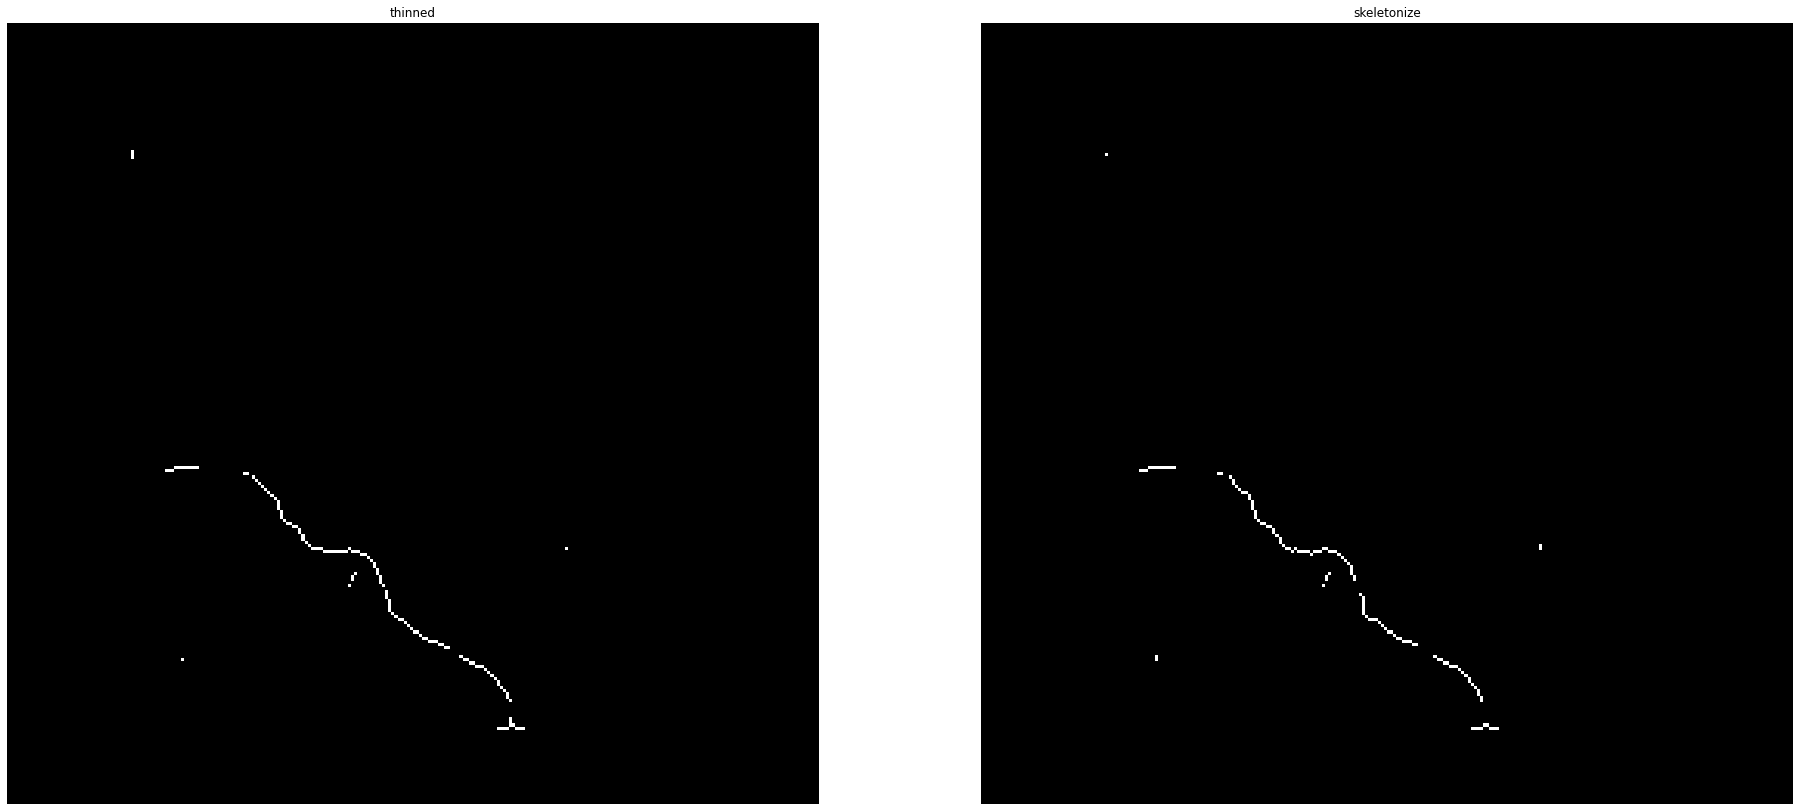

In [ ]:
skeleton = skeletonize(thresh,method='lee')
thinned = thin(thresh)
sk  = skeletonize(image)
skGray = cv2.cvtColor(sk, cv2.COLOR_BGR2GRAY)
plot_comparison(thinned, skeleton, 'thinned', 'skeletonize')

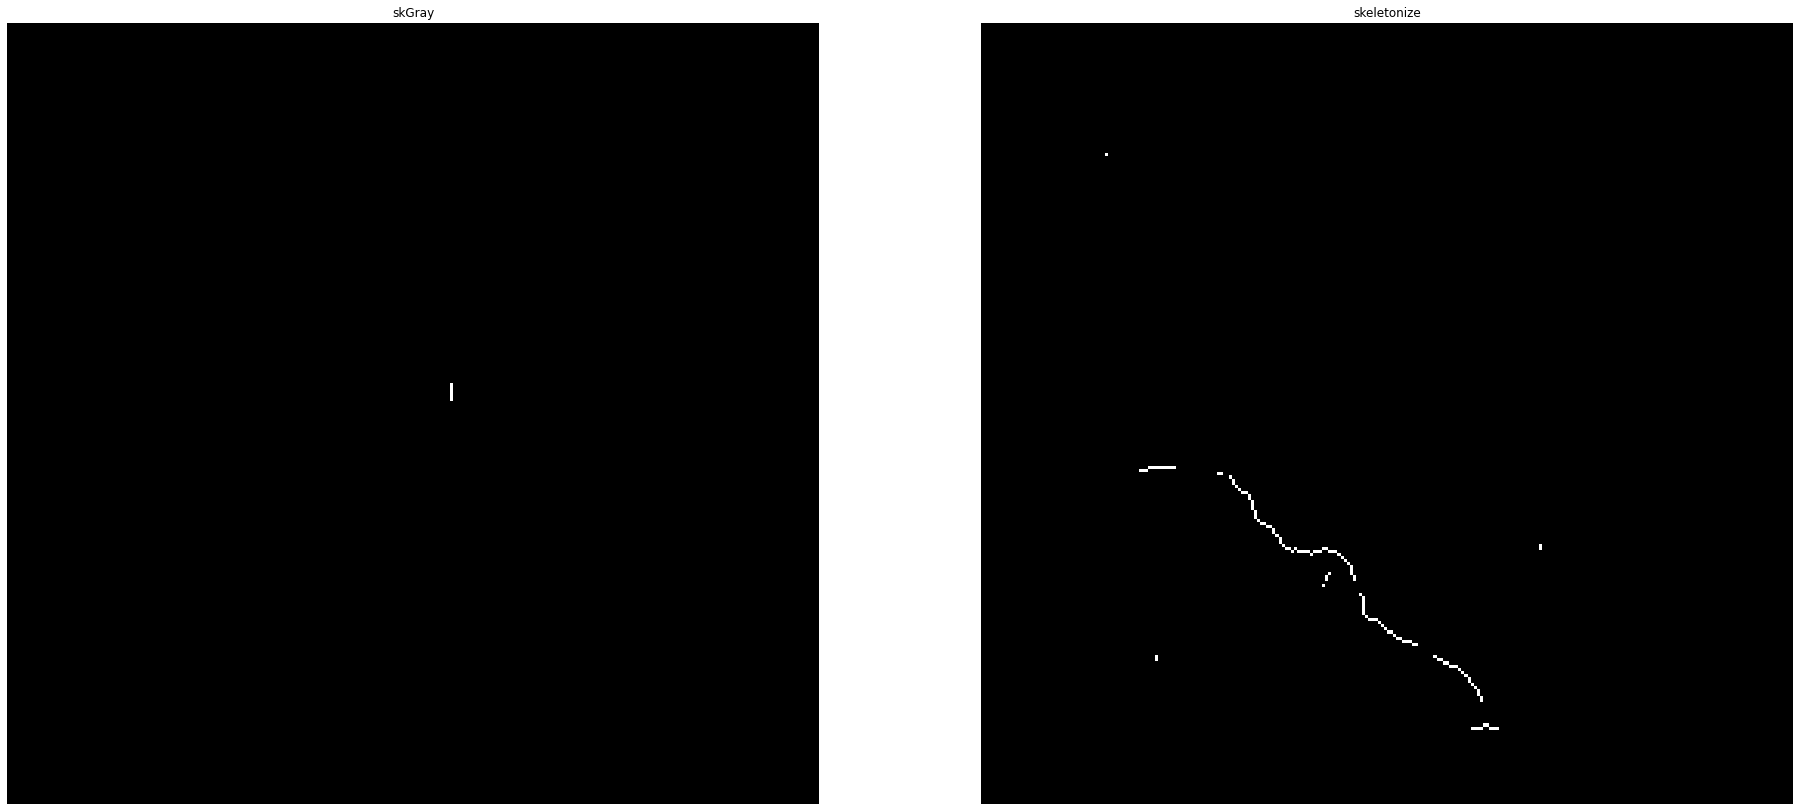

In [ ]:
plot_comparison(skGray, skeleton, 'skGray', 'skeletonize')

In [ ]:
ind= cv2.distanceTransform(255-thresh, cv2.DIST_L1, 5)
ind1= cv2.distanceTransform(255-thresh, cv2.DIST_L2, 5)

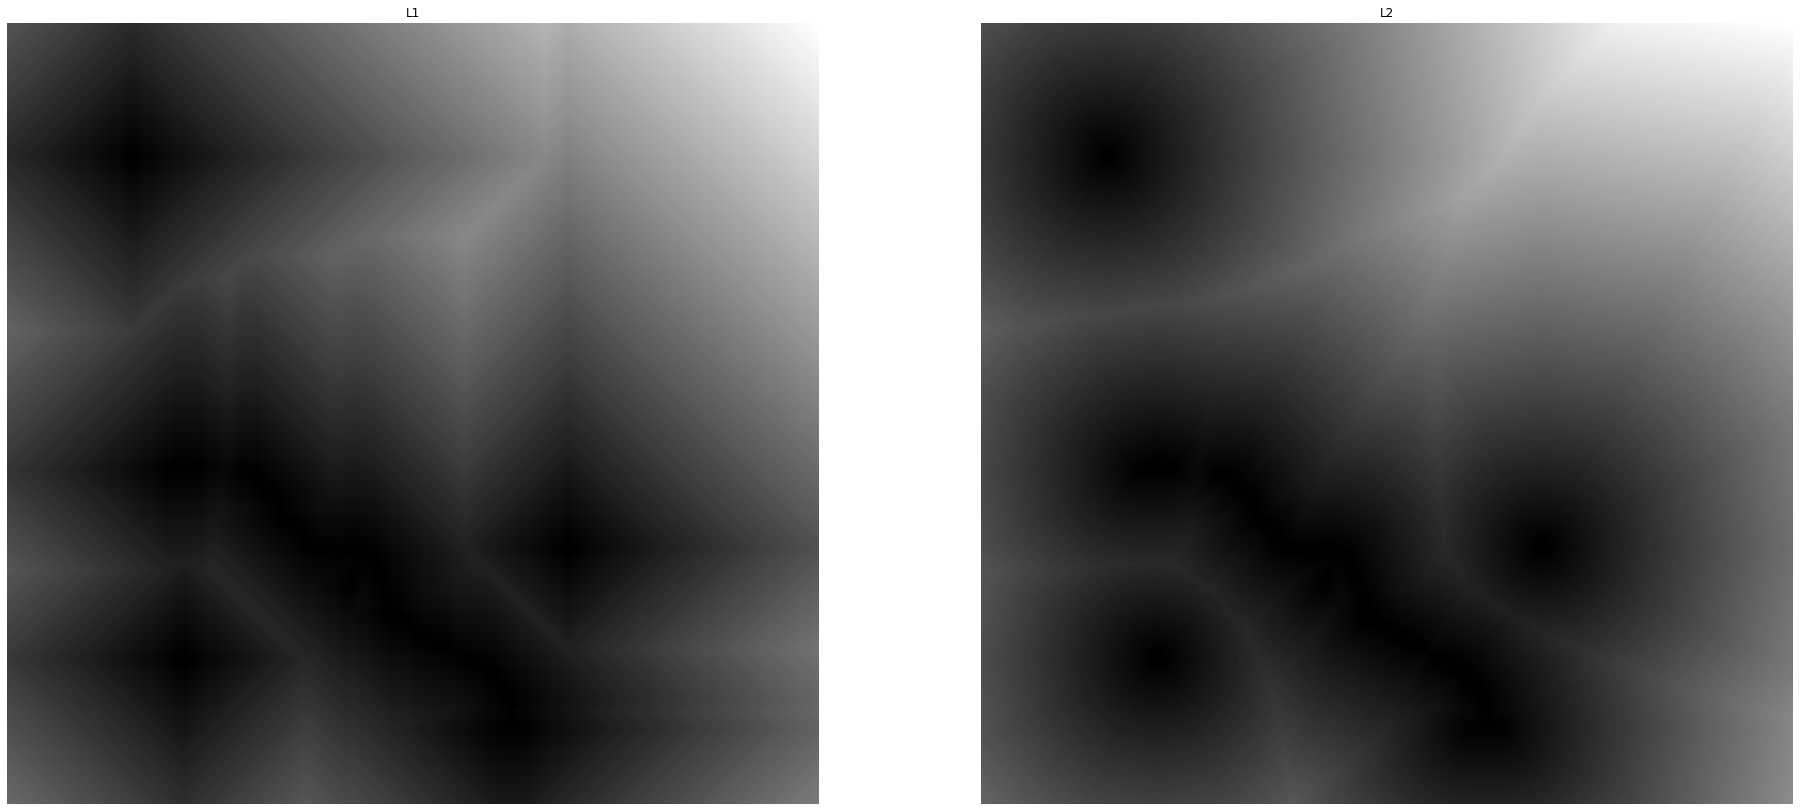

In [ ]:
plot_comparison(ind, ind1, 'L1', 'L2')

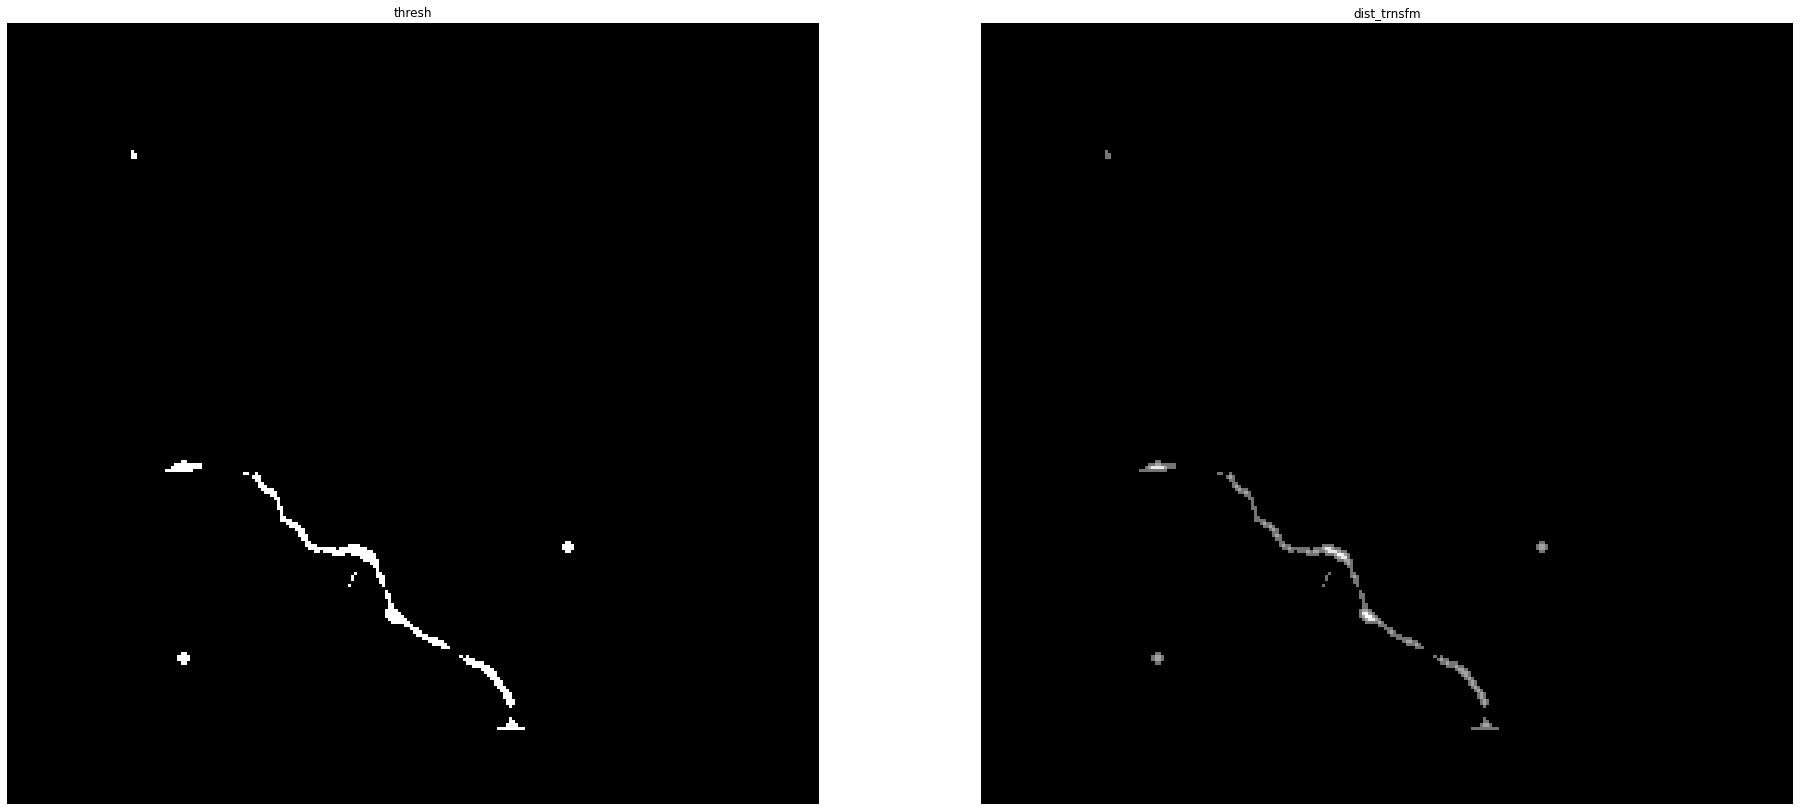

In [ ]:
ind2= cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plot_comparison(thresh, ind2, 'thresh', 'dist_trnsfm')

(252, 262, 3)


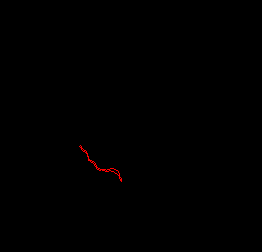

area of crack1 =  81.0
(252, 262, 3)


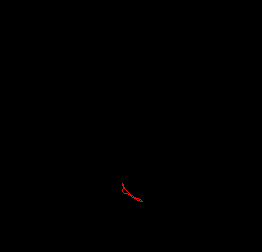

area of crack2 =  41.5
(252, 262, 3)


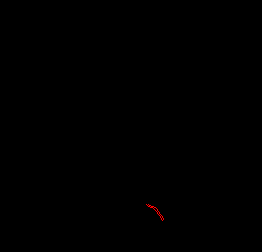

area of crack3 =  35.5
(252, 262, 3)


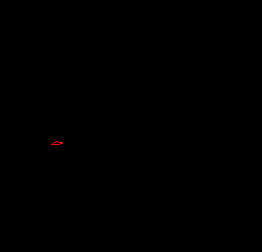

area of crack4 =  17.5
(252, 262, 3)


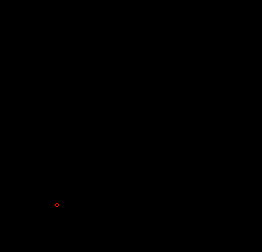

area of crack5 =  7.0
(252, 262, 3)


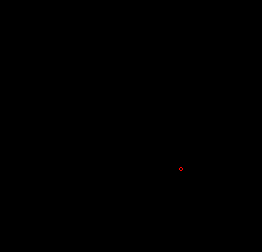

area of crack6 =  7.0
(252, 262, 3)


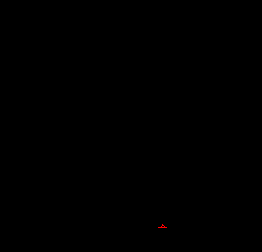

area of crack7 =  6.5
(252, 262, 3)


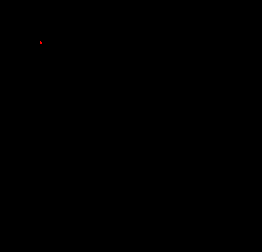

area of crack8 =  1.5
Bounding boxes:


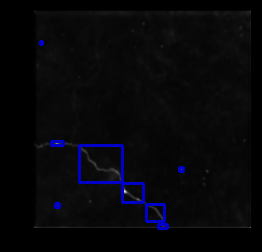

In [ ]:
cnts, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda x: cv2.contourArea(x), reverse=True)
a = 0
for cnt in cnts:
    if cv2.contourArea(cnt)>0:
        img_cnts = np.zeros(image.shape)
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.0001 * perimeter, True)

        x,y,w,h = cv2.boundingRect(cnt)
        roi=image[y:y+h,x:x+w]
        #cv2.imwrite('box {}.jpg'.format(a+1), roi)
        cv2.rectangle(image,(x,y),(x+w,y+h),(200,0,0),2)
        #cv2.putText(image,'Moth Detected',(x+w+10,y+h),0,0.3,(0,255,0))

        
        ac = cv2.drawContours(img_cnts,[approx], 0, (0, 0, 255), 1)
        print(ac.shape)
        #cv2.imwrite('area contour {}.jpg'.format(a+1), ac)
        cv2_imshow(img_cnts)
        print("area of crack{} = ".format(a+1),cv2.contourArea(cnt))
        a+=1
print("Bounding boxes:")
cv2_imshow(image)